# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Датасет имеет следующий набор данных:

 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
 - balcony — число балконов
 - ceiling_height — высота потолков (м)
 - cityCenters_nearest — расстояние до центра города (м)
 - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
 - first_day_exposition — дата публикации
 - floor — этаж
 - floors_total — всего этажей в доме
 - is_apartment — апартаменты (булев тип)
 - kitchen_area — площадь кухни в квадратных метрах (м²)
 - last_price — цена на момент снятия с публикации
 - living_area — жилая площадь в квадратных метрах(м²)
 - locality_name — название населённого пункта
 - open_plan — свободная планировка (булев тип)
 - parks_around3000 — число парков в радиусе 3 км
 - parks_nearest — расстояние до ближайшего парка (м)
 - ponds_around3000 — число водоёмов в радиусе 3 км
 - ponds_nearest — расстояние до ближайшего водоёма (м)
 - rooms — число комнат
 - studio — квартира-студия (булев тип)
 - total_area — площадь квартиры в квадратных метрах (м²)
 - total_images — число фотографий квартиры в объявлении

План работы:
- изучить исходный датасет;
- сделать предобработку данных;
- добавить необходимые параметры для исследования (цена квадратного метра, день недели публикации и тд);
- провести исследовательский анализ данных;
- сделать выводы;

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Изучение общей информации

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Построение гистограм

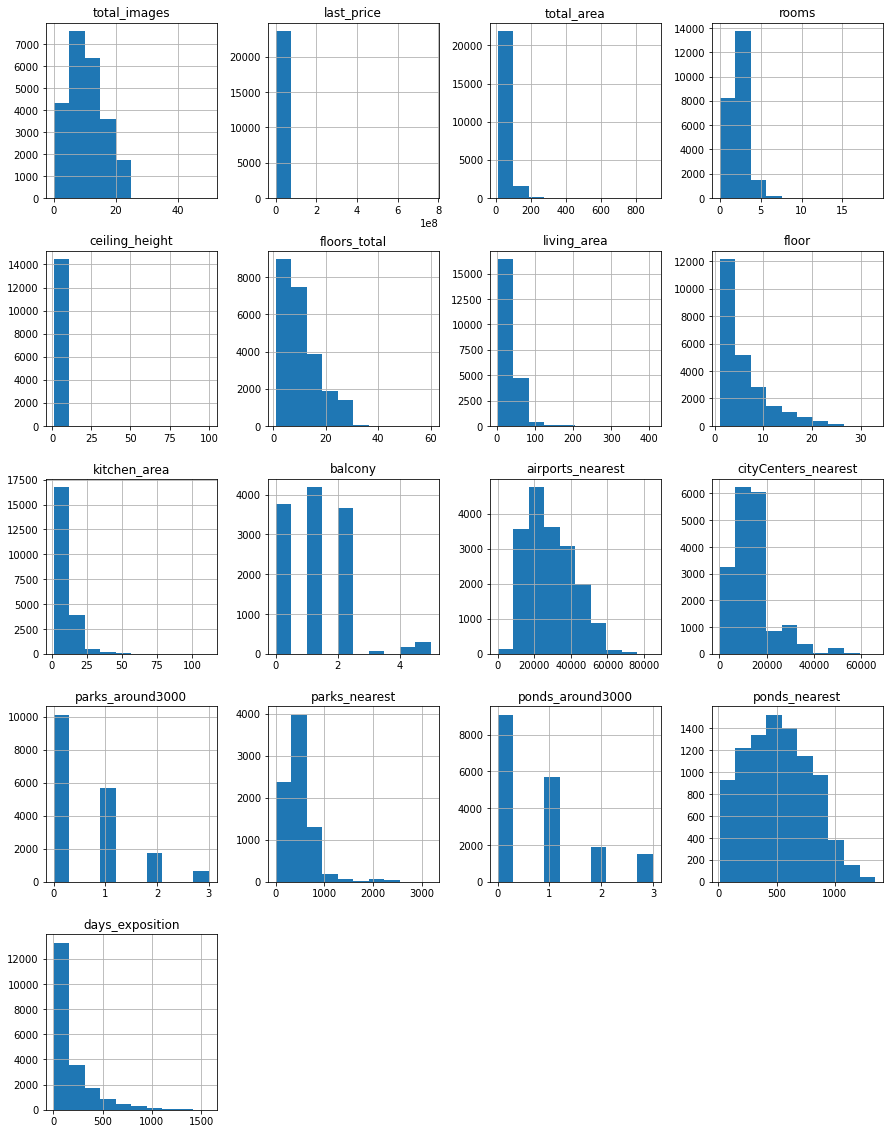

In [5]:
data.hist(figsize=(15, 20));

#### Вывод

Данные содержат информацию о продаже недвижимости в Санкт-Петербурге. Всего в датасете 23699 записей и 22 столбца, описывающих характеристики объектов недвижимости, такие как цена (last_price), площадь (total_area), количество комнат (rooms), высота потолков (ceiling_height), этаж (floor) и другие. Также в датасете имеются пропущенные значения в некоторых столбцах, например, в столбце ceiling_height пропущено более 9000 значений, а в столбце is_apartment - более 20000. Датасет содержит как числовые, так и строковые данные. Некоторые признаки, такие как balcony, parks_around3000, ponds_around3000, имеют тип данных float, что несколько не соответствует их смыслу. Также в датасете имеются столбцы, которые не будут использоваться в анализе, например, total_images.

Также в датасете есть данные, которые значительно выделяются отнсительно всей выборки - ceiling_height (100 метров), rooms (19 комнат) и пр.

### Предобработка данных

In [6]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16, grid=True)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

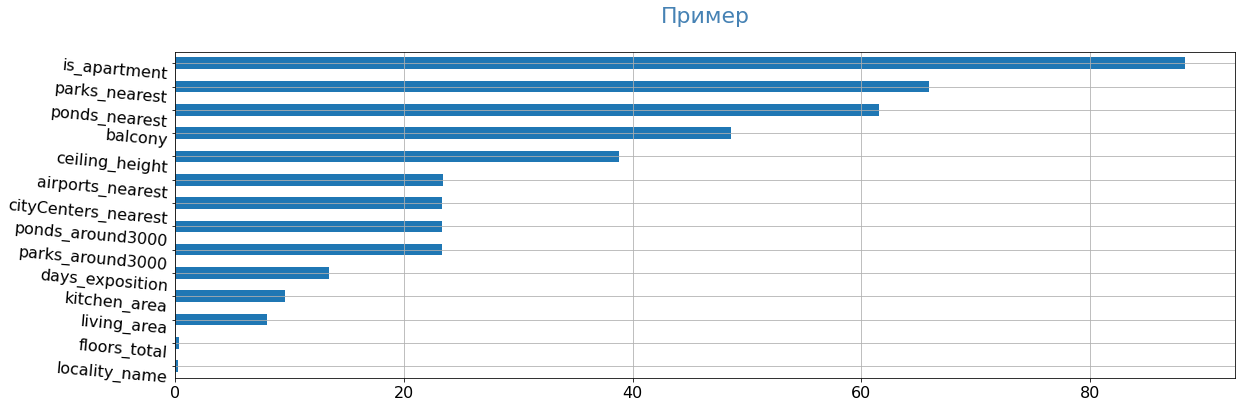

In [7]:
pass_value_barh(data)

#### Названия столбцов

Переименуем столбец cityCenters_nearest на city_centers_nearest

In [8]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

#### Обработка пропущенных значений

Очень много пропущенных значений в столбце is_apartment, значения имеют булевый тип. Логично предположить, что это незаполненные ячейки для типов жилья, не являющимися апартаментами, то есть для них актуально значиение False. 
Посмотрим количество уникальных значений в данном столбце.

In [9]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Аналогично поступим со столбцом balcony. Заменим пустые значения на нулевые.

In [11]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

#### Проверка синтетического метода заполнения

Построим график медианных значений общей площади, жилой площади и площади кухни в зависимости от количества комнат.  

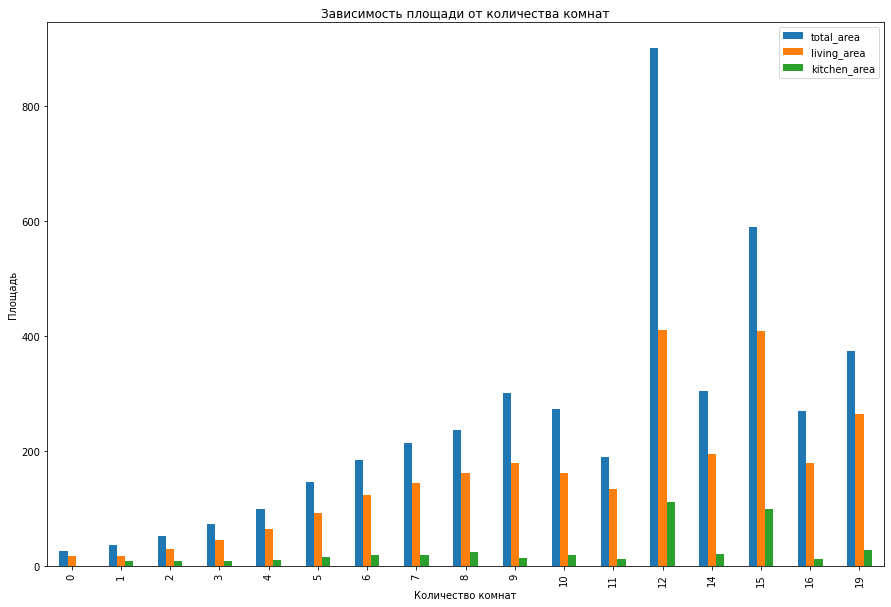

In [12]:
grouped_rooms = data.groupby('rooms').median()
grouped_rooms.plot(y=['total_area', 'living_area', 'kitchen_area'], kind='bar', figsize=(15, 10))
plt.xlabel('Количество комнат')
plt.ylabel('Площадь')
plt.title('Зависимость площади от количества комнат')
plt.show()

На графике прослеживается взаимосвязь между количеством комнат, площадью общей и площадью жилой. Однако площадь кухни не имеет похожей динамики, посчитаем корреляцию между количеством комнат и тремя площадьми.

In [13]:
print('Корреляция между общей площадью и количеством комнат:', round(data['total_area'].corr(data['rooms']), 2))
print('Корреляция между жилой площадью и количеством комнат:', round(data['living_area'].corr(data['rooms']), 2))
print('Корреляция между площадью кухни и количеством комнат:', round(data['kitchen_area'].corr(data['rooms']), 2))

Корреляция между общей площадью и количеством комнат: 0.76
Корреляция между жилой площадью и количеством комнат: 0.85
Корреляция между площадью кухни и количеством комнат: 0.27


In [14]:
check_values = data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])
check_values.value_counts()

False    23224
True       475
dtype: int64

Условия выполняют 475 объявления, значит, если их количество станет больше, то алгоритм приводит к появлению аномалий.

In [15]:
check_data = data
check_data['living_area'] = check_data.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median()))

In [16]:
check_values = check_data['total_area']*0.9 <= (check_data['living_area'] + check_data['kitchen_area'])
check_values.value_counts()

False    23194
True       505
dtype: int64

На данном этапе это все добавленные пользователем данные, которые можно было бы корректно заполнить.

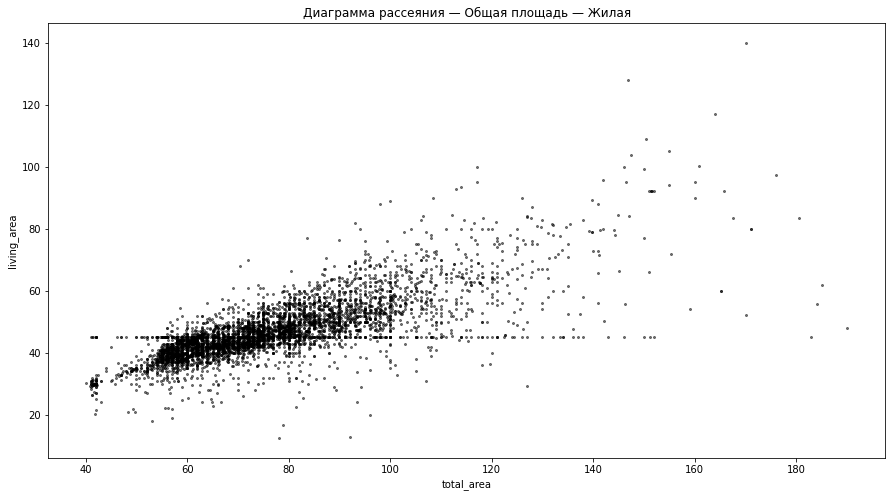

In [17]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

Аномалии проявились на графике (прямая неестественная для облака линия) — стоит принять решение оставить пропуски или заполнить маркерами
        
при изменении способа обработки колонок, стоит перепроверить код фильтрации
        
— любая замена пропусков очень трудоемка по ресурсам, т.к. приходится искать оптимальный вариант и если можно работать, имея пропуски в данных — лучше отказаться от заполнения

#### Удаление пропусков

В столбце floors_total пропущенных значений менее 1%, поэтому можем удалить эти строки.

In [18]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)

Посмотрим на столбец с названиями населенных пунктов locality_name. Пропусков в этом столбце меньше 1%, но если от них не избавиться - могут возникнуть трудности с обработкой неявных дубликатов в дальнейшем.

In [19]:
data['locality_name'].value_counts()

Санкт-Петербург         15651
посёлок Мурино            520
посёлок Шушары            439
Всеволожск                398
Пушкин                    369
                        ...  
деревня Мануйлово           1
деревня Новолисино          1
деревня Кисельня            1
деревня Вахнова Кара        1
деревня Хязельки            1
Name: locality_name, Length: 364, dtype: int64

Так как речь идёт о недвижимости в Санкт-Петербурге, и конкретно это название встречается с большим отрывом от остальных, заменим пропуски на него.

In [20]:
data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')

Заполним пропущенные значения в столбцах parks_around3000 и ponds_around3000 значениями 0, скорее всего пропущенные значения подразумевают отсутствие парков или водоемов в пределах 3 км

In [21]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

##### Причины пропусков данных:
1. Человеческий фактор (умышленный или случайный пропуск при заполнении информации о квартире)
2. Технические проблемы сбора данных или ошибки при их трансформации, например, при передаче данных из одного формата в другой, при чтении или записи файлов.

#### Изменение типов данных

Приведем столбцы first_day_exposition, floors_total, balcony, parks_around3000 и ponds_around3000  к соответствующим типам данных.

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613 entries, 0 to 23612
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

##### Необходимость преобразования типов данных

Преобразование типов данных в столбцах необходимо для дальнейшей корректной работы с данными. Например, если дата представленна в виде строки, то для выполнения математических операций с ней или сравнения с другими датами необходимо преобразовать в тип 'datetime'.

Уменьшить объем занимаемой памяти. Например, int занимает 4 байта, а float - 8 байт.

Целесообразность использования - количество комнат, этажей, балконов - считается целыми числами.

#### Проверка дубликатов

##### Полные дубликаты

In [23]:
print(data.duplicated().sum())

0


##### Неявные дубликаты

In [24]:
print(data['locality_name'].value_counts())

Санкт-Петербург         15699
посёлок Мурино            520
посёлок Шушары            439
Всеволожск                398
Пушкин                    369
                        ...  
деревня Мануйлово           1
деревня Новолисино          1
деревня Кисельня            1
деревня Вахнова Кара        1
деревня Хязельки            1
Name: locality_name, Length: 364, dtype: int64


Уникальных записей 364. Изучим уникальные названия в столбце locality_name по-подробнее.

In [25]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Приведем к нижнему регистру столбец locality_name, заменим "посёлок", "поселок городского типа", "городской поселок", "коттеджный поселок", "поселок станции" на "поселок" и посмотрим как изменится количество уникальных записей значений после каждого этапа.

In [26]:
data['locality_name'] = data['locality_name'].str.lower()
print(len(data['locality_name'].unique()), 'нижний регистр')

data['locality_name'] = data['locality_name'].apply(lambda x: x.replace('посёлок', 'поселок'))
print(len(data['locality_name'].unique()),'избавляемся от букв \"ё"')

data['locality_name'] = data['locality_name'].apply(lambda x: x.replace('поселок городского типа', 'поселок'))
print(len(data['locality_name'].unique()),'заменяем строку \"поселок городского типа" на \"поселок"')

data['locality_name'] = data['locality_name'].apply(lambda x: x.replace('городской поселок', 'поселок'))
print(len(data['locality_name'].unique()),'заменяем строку \"городской поселок" на \"поселок"')

data['locality_name'] = data['locality_name'].apply(lambda x: x.replace('коттеджный поселок', 'поселок'))
print(len(data['locality_name'].unique()),'заменяем строку \"коттеджный поселок" на \"поселок"')

data['locality_name'] = data['locality_name'].apply(lambda x: x.replace('поселок станции', 'поселок'))
print(len(data['locality_name'].unique()),'заменяем строку \"поселок станции" на \"поселок')

364 нижний регистр
330 избавляемся от букв "ё"
329 заменяем строку "поселок городского типа" на "поселок"
322 заменяем строку "городской поселок" на "поселок"
321 заменяем строку "коттеджный поселок" на "поселок"
320 заменяем строку "поселок станции" на "поселок


##### Вывод

Количество записей изменилось. Видно, что каждый этап уменьшал количество уникальных значений, а значит мы привели к одному виду разные названия одних и тех же населенных пунктов.

In [27]:
# check
data.locality_name.nunique()

320

In [28]:
data.duplicated().sum()

0

#### Работа с аномалиями

##### Исправление некорректных записей

Изучим по подробнее столбец ceiling_height на предмет аномалий.

100.0 1.0


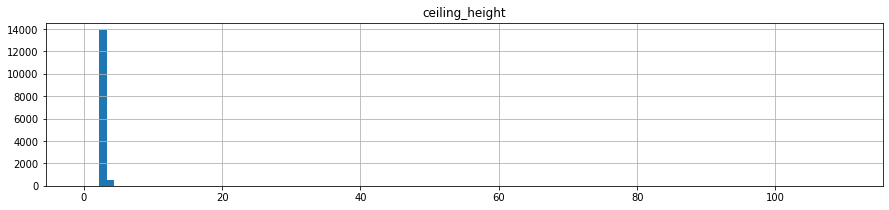

In [29]:
print(data['ceiling_height'].max(), data['ceiling_height'].min())
data.hist('ceiling_height', bins=100, range=(0, 110), figsize=(15, 3));

На гистограмме видны выбросы в районе 25 и 30 метров. Скорее всего это ошибка, возникшая при заполнении данных.

Также есть максимальное значение в 100 метров - точно аномалия.

Посмотрим на записи, где высота потолков начинается от 20 метров до 40 метров, так как это может быть ошибка при заполнении и такие значения можно уменьшить на порядок, не потеряв в реалистичности.

In [30]:
data.query('ceiling_height >= 20 ').sort_values('ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22785,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,False,False,11.0,5,санкт-петербург,34963.0,8283.0,1,223.0,3,30.0,19.0
22255,19,9999000.0,92.4,2019-04-05,2,32.0,6,55.5,5,False,False,False,16.5,4,санкт-петербург,18838.0,3506.0,0,NaN,3,511.0,NaN
3138,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0,волхов,NaN,NaN,0,NaN,0,NaN,NaN
21298,19,4900000.0,42.0,2017-04-18,1,27.5,24,37.7,19,False,False,False,11.0,2,санкт-петербург,42742.0,9760.0,0,NaN,0,NaN,61.0
22854,14,4000000.0,98.0,2018-03-15,4,27.0,2,73.0,2,True,False,False,9.0,1,деревня нижняя,NaN,NaN,0,NaN,0,NaN,27.0
17787,1,3900000.0,56.0,2017-12-22,3,27.0,5,33.0,4,False,False,False,NaN,0,санкт-петербург,41030.0,15543.0,0,NaN,0,NaN,73.0
4860,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,False,True,NaN,2,поселок мурино,NaN,NaN,0,NaN,0,NaN,28.0
5227,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,False,False,9.0,2,деревня мины,NaN,NaN,0,NaN,0,NaN,540.0
5787,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,False,False,12.0,5,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,38.0
21743,20,2450000.0,44.0,2019-02-12,2,27.0,2,38.0,2,False,False,False,8.6,2,поселок большая ижора,NaN,NaN,0,NaN,0,NaN,NaN


Обработаем аномальные значения

In [31]:
data = data.loc[data['ceiling_height'] != 100]
data.loc[data['ceiling_height'] >= 20, 'ceiling_height' ] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10

Посмотрим общее описание датасета на предмет аномалий и выбросов

In [32]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23612.000000,2.361200e+04,23612.000000,23612.000000,14494.000000,23612.000000,23612.000000,23612.000000,21381.000000,23612.000000,18080.000000,18103.000000,23612.000000,8044.000000,23612.000000,9060.000000,20440.000000
mean,9.874936,6.540197e+06,60.342175,2.071193,2.729076,10.674064,34.332880,5.877350,10.564107,0.592877,28787.666648,14185.410043,0.468787,490.587892,0.590378,518.263355,180.892759
std,5.681298,1.090181e+07,35.649001,1.078380,0.314196,6.597209,21.712734,4.873639,5.904454,0.959899,12626.475623,8614.258521,0.748497,341.344878,0.884316,277.855479,219.687999
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.400000,2.000000,7.000000,0.000000,18574.750000,9234.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.100000,0.000000,26726.000000,13094.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.800000,16.000000,42.700000,8.000000,12.000000,1.000000,37242.500000,16289.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,14.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


##### Отчистка от аномалий

На данном этапе в датасете 23612  записей. После обработки аномалий должно сохранится не менее 90% записей, а также на каждом этапе будем считать процент потерь по каждому столбцу(этот процент не должен превышать 1%) 

###### last_price

count    2.361200e+04
mean     6.540197e+06
std      1.090181e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

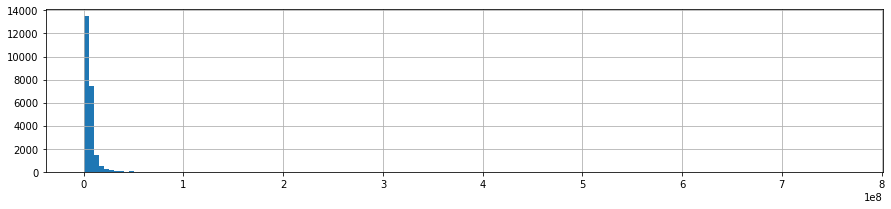

In [34]:
data['last_price'].hist(bins = 150, figsize = (15,3));
data['last_price'].describe()

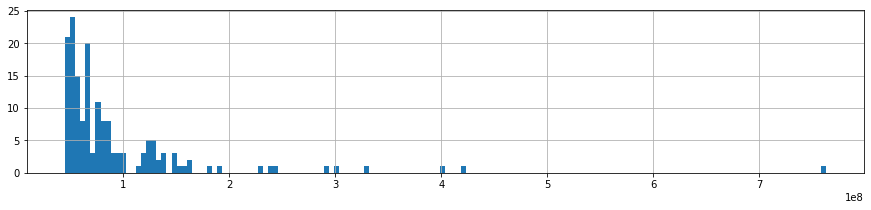

In [35]:
data['last_price'].hist(bins=150, figsize=(15, 3), range=(45000000, 763000000));
upper_cross = data[data['last_price'] >= 45000000]['last_price'].count() / data['last_price'].count()

0.007707945112654583


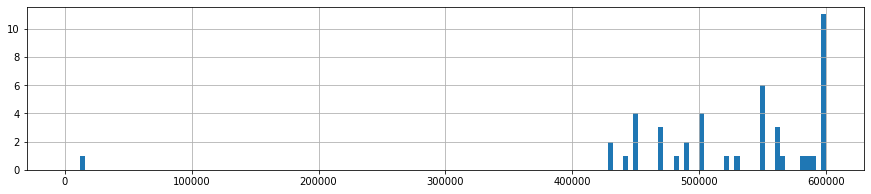

In [36]:
data['last_price'].hist(bins=150, figsize=(15, 3), range=(0, 600000));
low_cross = data[data['last_price'] <= 500000]['last_price'].count() / data['last_price'].count()
print(upper_cross+low_cross)

Перезапишем датафрейм data в новую переменную. После обработки аномалий посчитаем процент сохранившихся записей.

In [37]:
clean_data = data.query('500000 < last_price < 45000000')
clean_data['last_price'].describe()

count    2.343000e+04
mean     5.941218e+06
std      4.718785e+06
min      5.200000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.450000e+07
Name: last_price, dtype: float64

###### total_area

count    23430.000000
mean        59.058365
std         30.439994
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        494.100000
Name: total_area, dtype: float64

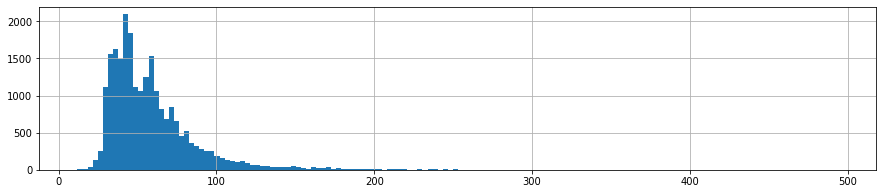

In [38]:
clean_data['total_area'].hist(bins=150, figsize=(15,3));
clean_data['total_area'].describe()

0.00597524541186513

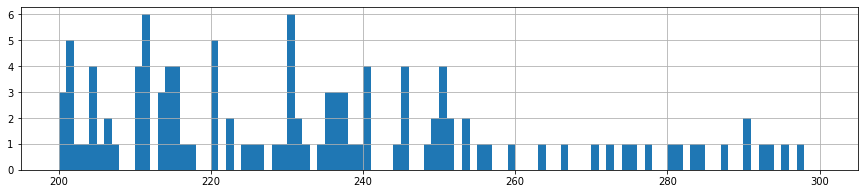

In [39]:
clean_data['total_area'].hist(bins=100, figsize=(15,3), range=(200, 300));
upper_cross = clean_data[clean_data['total_area'] >= 200]['total_area'].count() / clean_data['total_area'].count()
upper_cross

0.007469056764831413


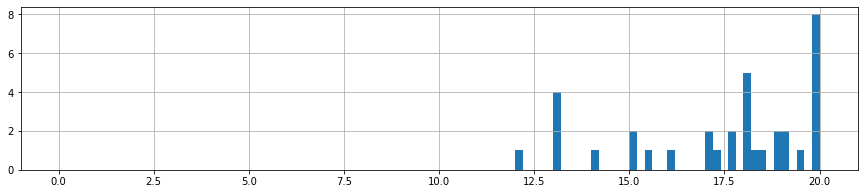

In [40]:
clean_data['total_area'].hist(bins=100, figsize=(15, 3), range=(0,20));
low_cross = clean_data[clean_data['total_area'] <= 20]['total_area'].count() / clean_data['total_area'].count()
print(upper_cross + low_cross)

In [41]:
clean_data = clean_data.query('20 <= total_area <= 200')
clean_data['total_area'].describe()

count    23266.000000
mean        57.932325
std         25.962367
min         20.000000
25%         40.000000
50%         51.700000
75%         68.500000
max        200.000000
Name: total_area, dtype: float64

###### rooms

count    23266.000000
mean         2.032838
std          0.992361
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

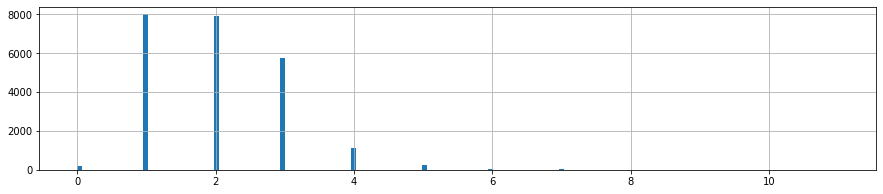

In [42]:
clean_data['rooms'].hist(bins=150, figsize=(15,3));
clean_data['rooms'].describe()

0.0010315481818963293

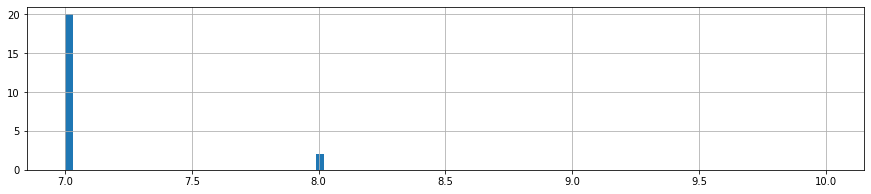

In [43]:
clean_data['rooms'].hist(bins=100, figsize=(15,3), range=(7, 10));
upper_cross = clean_data[clean_data['rooms'] >= 7]['rooms'].count() / clean_data['rooms'].count()
upper_cross

0.008983065417347202


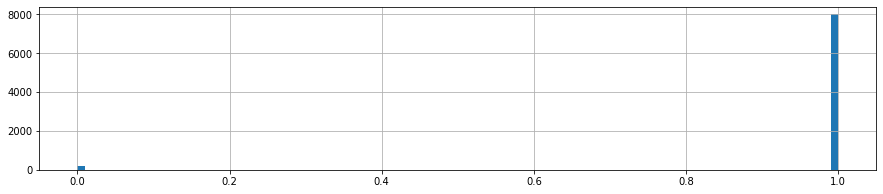

In [44]:
clean_data['rooms'].hist(bins=100, figsize=(15,3), range=(0, 1));
low_cross = clean_data[clean_data['rooms'] < 1]['rooms'].count() / clean_data['rooms'].count()
print(upper_cross + low_cross)

In [45]:
clean_data = clean_data.query('0 < rooms <= 7')
clean_data['rooms'].describe()

count    23077.00000
mean         2.04784
std          0.97439
min          1.00000
25%          1.00000
50%          2.00000
75%          3.00000
max          7.00000
Name: rooms, dtype: float64

###### ceiling_height

count    14203.000000
mean         2.719597
std          0.299982
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

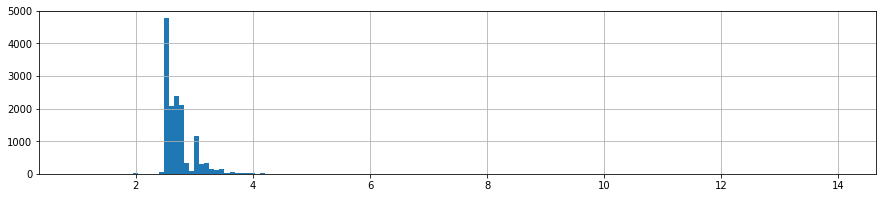

In [46]:
clean_data['ceiling_height'].hist(bins=150, figsize=(15,3));
clean_data['ceiling_height'].describe()

In [47]:
clean_data['ceiling_height'].isna().sum()

8874

Количество элементов значительно меньше из-за пропущенных значений. Учтем это при фильтрации данных.

0.002675491093430965

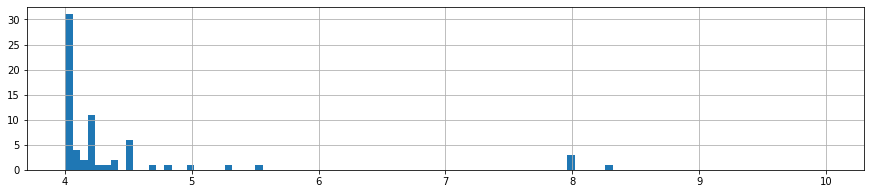

In [48]:
clean_data['ceiling_height'].hist(bins=100, figsize=(15,3), range=(4, 10));
upper_cross = clean_data[clean_data['ceiling_height'] > 4]['ceiling_height'].count() / clean_data['ceiling_height'].count()
upper_cross

0.0028867140744913045


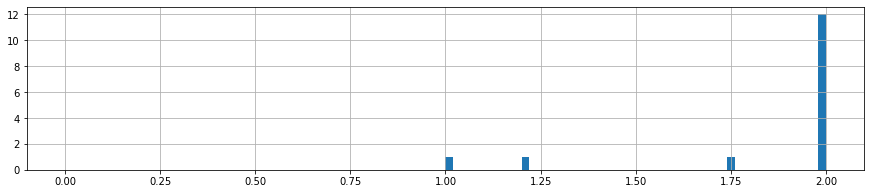

In [49]:
clean_data['ceiling_height'].hist(bins=100, figsize=(15,3), range=(0, 2));
low_cross = clean_data[clean_data['ceiling_height'] < 2]['ceiling_height'].count() / clean_data['ceiling_height'].count()
print(low_cross + upper_cross)

In [50]:
clean_data = clean_data[(clean_data['ceiling_height'] >= 2) &
                        (clean_data['ceiling_height'] <= 4) |
                        (clean_data['ceiling_height'].isna())]
clean_data['ceiling_height'].describe()

count    14162.000000
mean         2.713277
std          0.249126
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

###### days_exposition

count    19958.000000
mean       179.902646
std        218.264811
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

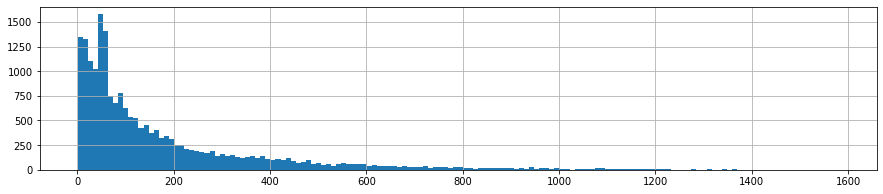

In [51]:
clean_data['days_exposition'].hist(bins=150, figsize=(15, 3))
clean_data['days_exposition'].describe()

0.004309049002906103

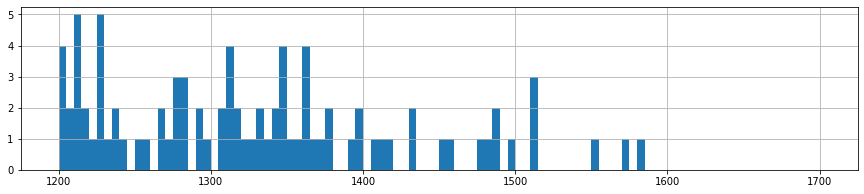

In [52]:
clean_data['days_exposition'].hist(bins=100, figsize=(15,3), range=(1200, 1700));
upper_cross = clean_data[clean_data['days_exposition']>1200]['days_exposition'].count() / clean_data['days_exposition'].count()
upper_cross

0.0045094698867622005


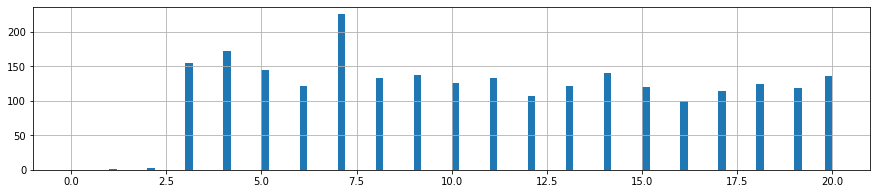

In [53]:
clean_data['days_exposition'].hist(bins=100, figsize=(15,3), range=(0, 20));
low_cross = clean_data[clean_data['days_exposition'] < 3]['days_exposition'].count() / clean_data['days_exposition'].count()
print(low_cross + upper_cross)

In [54]:
clean_data = clean_data[(clean_data['days_exposition'] >= 3) &
                       (clean_data['days_exposition'] <= 1200) |
                       (clean_data['days_exposition'].isna())]
clean_data['days_exposition'].describe()

count    19868.000000
mean       174.958073
std        205.068259
min          3.000000
25%         45.000000
50%         95.000000
75%        227.000000
max       1200.000000
Name: days_exposition, dtype: float64

###### living_area

count    22946.000000
mean        33.080866
std         16.920304
min          2.000000
25%         18.400000
50%         30.200000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

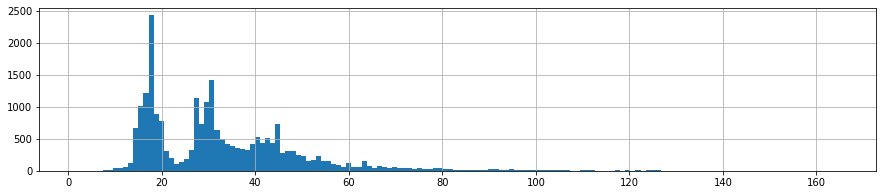

In [55]:
clean_data['living_area'].hist(bins=150, figsize=(15, 3))
clean_data['living_area'].describe()

0.002048287283186612

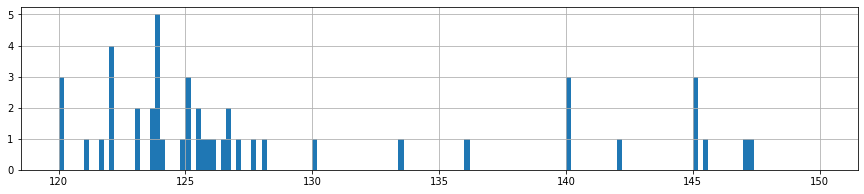

In [56]:
clean_data['living_area'].hist(bins=150, figsize=(15,3), range=(120, 150));
upper_cross = clean_data[clean_data['living_area']>120]['living_area'].count() / clean_data['living_area'].count()
upper_cross

0.0029634794735465876


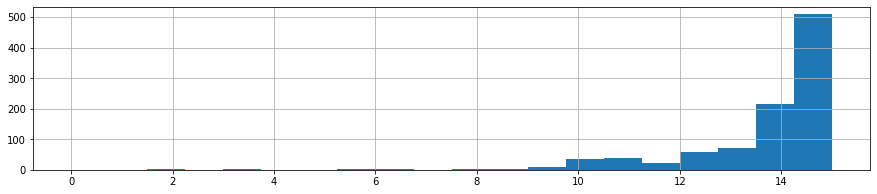

In [57]:
clean_data['living_area'].hist(bins=20, figsize=(15,3), range=(0, 15));
low_cross = clean_data[clean_data['living_area']<10]['living_area'].count() / clean_data['living_area'].count()
print(low_cross+upper_cross)

In [58]:
clean_data = clean_data[(clean_data['living_area'] <= 120) &
                       (clean_data['living_area'] >= 10) |
                       (clean_data['living_area'].isna())]
clean_data['living_area'].describe()

count    22878.000000
mean        32.902354
std         16.324198
min         10.000000
25%         18.400000
50%         30.200000
75%         42.000000
max        120.000000
Name: living_area, dtype: float64

###### kitchen_area

count    20916.000000
mean        10.286345
std          5.109282
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max         65.000000
Name: kitchen_area, dtype: float64

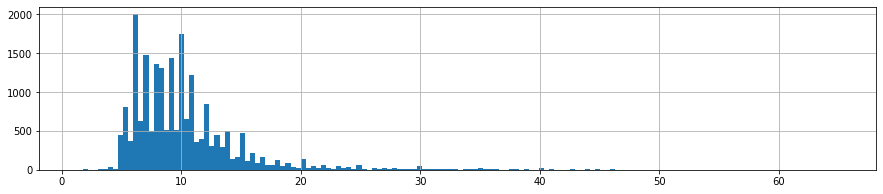

In [59]:
clean_data['kitchen_area'].hist(bins=150, figsize=(15, 3))
clean_data['kitchen_area'].describe()

0.0037770128131573914

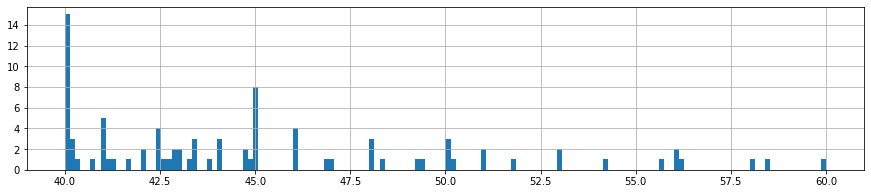

In [60]:
clean_data['kitchen_area'].hist(bins=150, figsize=(15,3), range=(40, 60));
upper_cross = clean_data[clean_data['kitchen_area']>40]['kitchen_area'].count() / clean_data['kitchen_area'].count()
upper_cross

0.008510231401797666


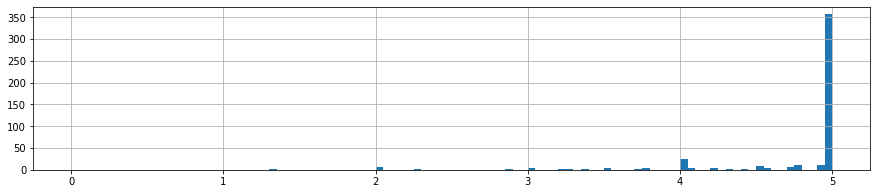

In [61]:
clean_data['kitchen_area'].hist(bins=100, figsize=(15,3), range=(0, 5));
low_cross = clean_data[clean_data['kitchen_area']<5]['kitchen_area'].count() / clean_data['kitchen_area'].count()
print(low_cross+upper_cross)

In [62]:
clean_data['kitchen_area'].isna().sum()

1962

In [63]:
clean_data = clean_data[(clean_data['kitchen_area'] <= 40) &
                       (clean_data['kitchen_area'] >= 5) |
                       (clean_data['kitchen_area'].isna())]
clean_data['kitchen_area'].describe()

count    20738.000000
mean        10.174390
std          4.547954
min          5.000000
25%          7.000000
50%          9.000000
75%         11.700000
max         40.000000
Name: kitchen_area, dtype: float64

###### floor

count    22700.000000
mean         5.884846
std          4.872835
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

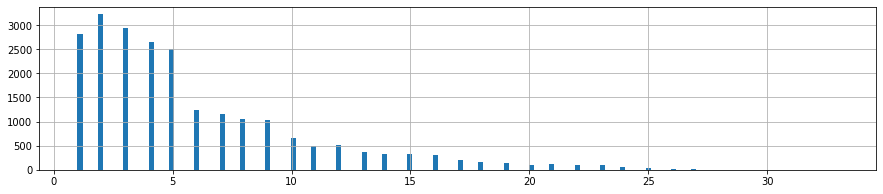

In [64]:
clean_data['floor'].hist(bins=150, figsize=(15, 3))
clean_data['floor'].describe()

0.0016740088105726871

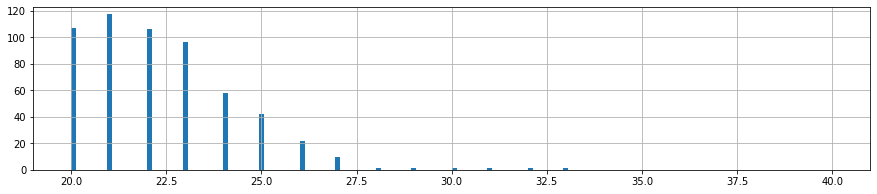

In [65]:
clean_data['floor'].hist(bins=150, figsize=(15,3), range=(20, 40));
upper_cross = clean_data[clean_data['floor']>25]['floor'].count() / clean_data['floor'].count()
upper_cross

In [66]:
clean_data = clean_data.query('floor <= 25')
clean_data['floor'].describe()

count    22662.000000
mean         5.849484
std          4.799201
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         25.000000
Name: floor, dtype: float64

###### floors_total

count    22662.000000
mean        10.686347
std          6.545940
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

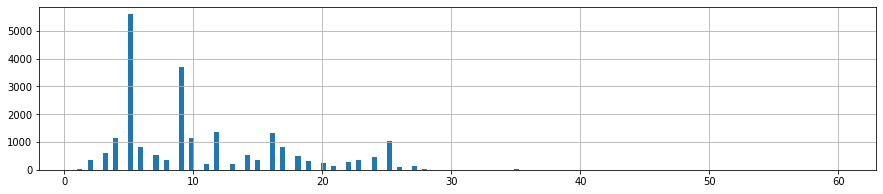

In [67]:
clean_data['floors_total'].hist(bins=150, figsize=(15, 3))
clean_data['floors_total'].describe()

0.0017650692789691995

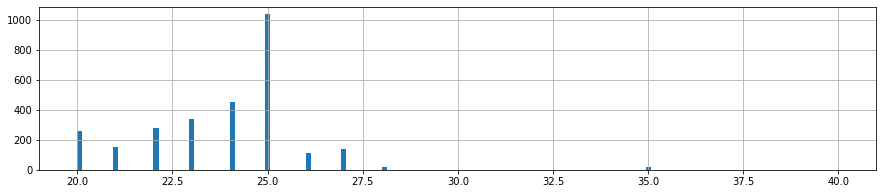

In [68]:
clean_data['floors_total'].hist(bins=150, figsize=(15,3), range=(20, 40));
upper_cross = clean_data[clean_data['floors_total']>27]['floors_total'].count() / clean_data['floors_total'].count()
upper_cross

In [69]:
clean_data = clean_data.query('floors_total < 27')
clean_data['floors_total'].describe()

count    22483.000000
mean        10.546546
std          6.371795
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         26.000000
Name: floors_total, dtype: float64

Проверим наличие аномалий в датасете.

In [70]:
(
    clean_data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,483.00","22,483.00","13,834.00","19,489.00","22,483.00","22,483.00","20,532.00","22,483.00","22,483.00"
min,1.00,20.00,2.00,3.00,"520,000.00",10.00,5.00,1.00,1.00
max,7.00,200.00,4.00,"1,200.00","44,500,000.00",120.00,40.00,25.00,26.00
median,2.00,52.00,2.65,94.00,"4,600,000.00",30.30,9.00,4.00,9.00


Посчитаем процент потерь.

In [71]:
len(clean_data) / len(data)

0.9521853294934779

Более 95% записей сохраненно.

##### Вывод

На данном этапе мы закончили предобработку данных. 

Заполнили пропуски, где это было логично, избавились от неявных дубликатов, выбросов и аномалий в данных.

Особенности которые были обнаружены:
1. Пропущенные значения - отсутствие данных в некоторых ячейках датафрейма.
2. Выбросы - значения, которые являются аномальными или необычными по сравнению с остальными значениями в столбце.
3. Неявные дубликаты - разные названия одного и того же населенного пункта.
4. Неоднородность - разные типы данных в одном столбце или несоответствие формата данных между столбцами.




#### check gap

In [72]:
# check
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22483 entries, 0 to 23612
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22483 non-null  int64         
 1   last_price            22483 non-null  float64       
 2   total_area            22483 non-null  float64       
 3   first_day_exposition  22483 non-null  datetime64[ns]
 4   rooms                 22483 non-null  int64         
 5   ceiling_height        13834 non-null  float64       
 6   floors_total          22483 non-null  int64         
 7   living_area           22483 non-null  float64       
 8   floor                 22483 non-null  int64         
 9   is_apartment          22483 non-null  bool          
 10  studio                22483 non-null  bool          
 11  open_plan             22483 non-null  bool          
 12  kitchen_area          20532 non-null  float64       
 13  balcony         

In [74]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [75]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


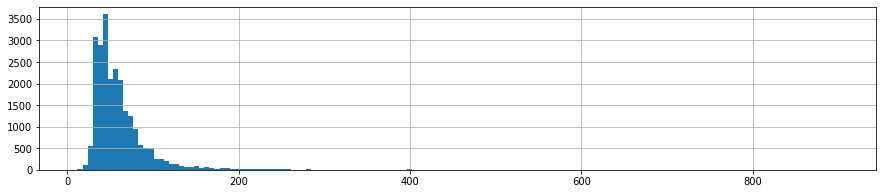

In [76]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

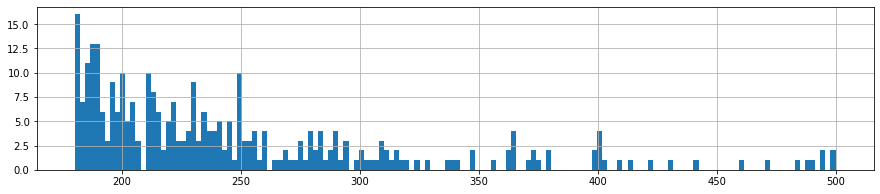

In [77]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

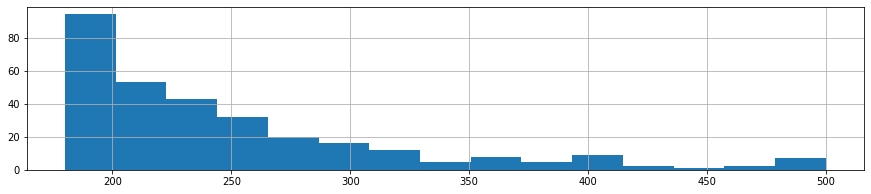

In [78]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

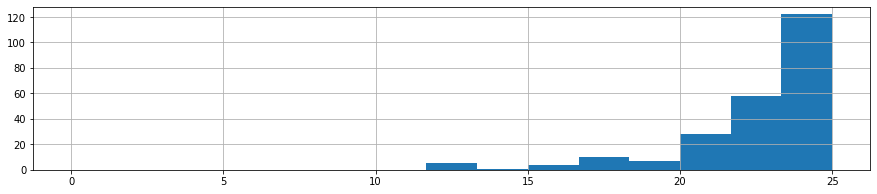

In [79]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [80]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.28,3.00,"561,666.00",10.00,3.80,1.00,2.00
0.01,1.00,25.37,2.50,4.00,"1,000,000.00",13.09,5.00,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,650,000.00",30.30,9.10,4.00,9.00
0.99,5.00,197.18,3.78,"1,067.00","36,000,000.00",118.86,35.06,23.00,26.00
0.9988,8.00,380.00,4.68,"1,370.37","124,826,736.00",214.33,60.00,26.00,35.00


### Посчитайте и добавьте в таблицу новые столбцы

#### Добавление столбцов для расчета

Добавим в таблицу столбцы: 
 - цена одного квадратного метра;
 - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
 - месяц публикации объявления;
 - год публикации объявления;
 - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [81]:
clean_data['metrs_price'] = clean_data['last_price'] / clean_data['total_area']
clean_data['week_day'] = clean_data['first_day_exposition'].dt.weekday
clean_data['month'] = clean_data['first_day_exposition'].dt.month
clean_data['year'] = clean_data['first_day_exposition'].dt.year
clean_data['city_centers_km'] = round(clean_data['city_centers_nearest'] / 1000)
clean_data['days_exposition'] = round(clean_data['days_exposition'])

Добвим столбец floors_type, который будет содержать значения
 - тип этажа квартиры (значения — «‎первый», «последний», «другой»);

при помощи функции floor_type

In [82]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
clean_data['floors_type'] = clean_data.apply(floor_type, axis=1)
clean_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metrs_price,week_day,month,year,city_centers_km,floors_type
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,16.0,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,19.0,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,14.0,другой
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,False,False,9.1,0,поселок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.789474,0,9,2018,NaN,другой
6,6,3700000.0,37.3,2017-11-02,1,NaN,26,10.6,6,False,False,False,14.4,1,поселок парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456,3,11,2017,19.0,другой


#### Вывод

На данном этапе добавили новые столбцы, которые помогут для дальнейших расчетов и нахождения зависимостей.

In [83]:
clean_data['rooms'].min()

1

### Проведите исследовательский анализ данных

#### Построение гистограм

Построим гистограммы для значений:

 - общая площадь;
 - жилая площадь;
 - площадь кухни;
 - цена объекта;
 - количество комнат;
 - высота потолков;
 - этаж квартиры;
 - общее количество этажей в доме;
 - расстояние до центра города в метрах;
 - расстояние до ближайшего аэропорта;
 - расстояние до ближайшего парка;
 - день и месяц публикации объявления.

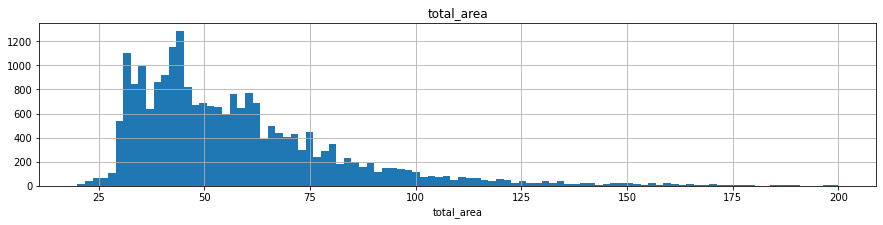

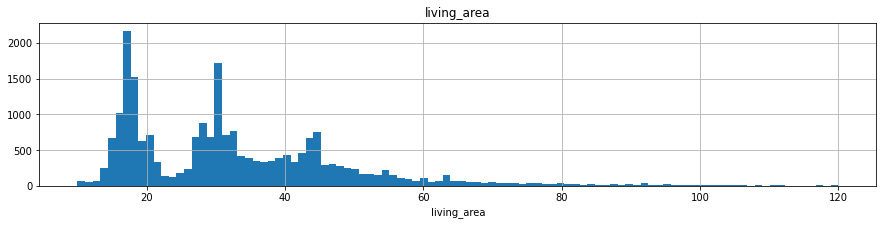

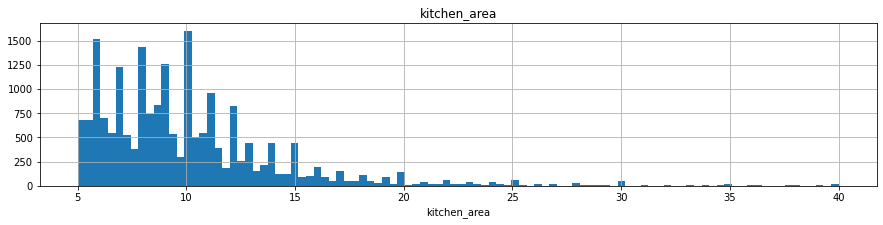

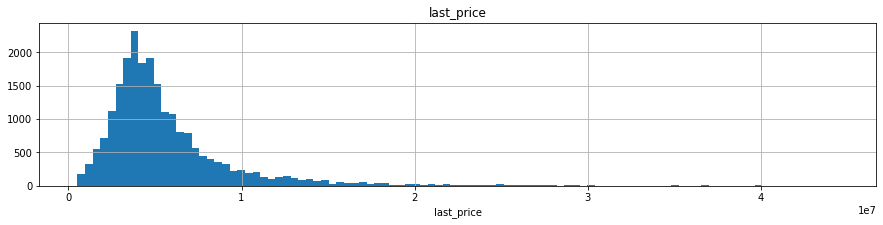

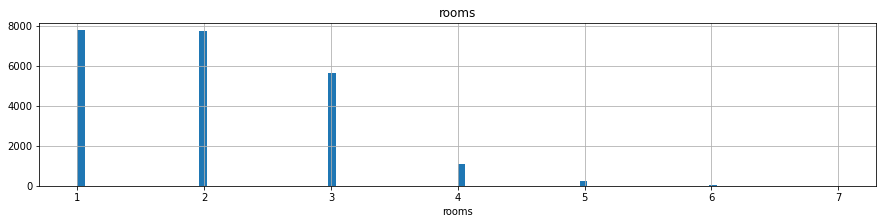

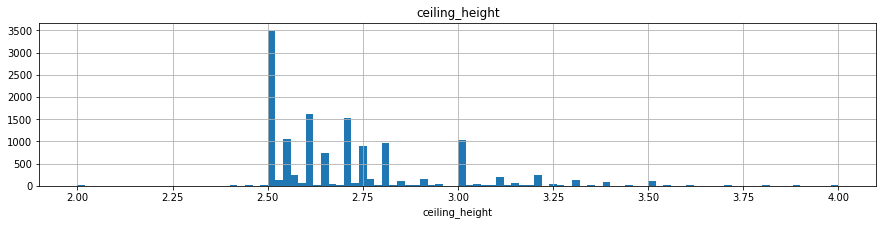

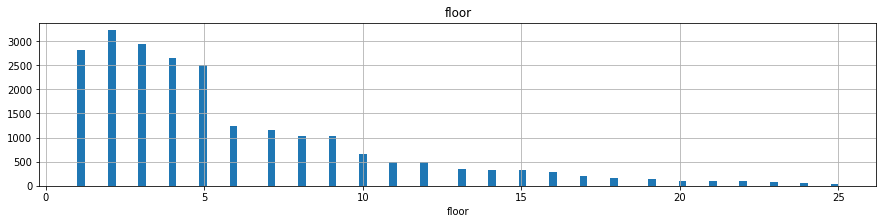

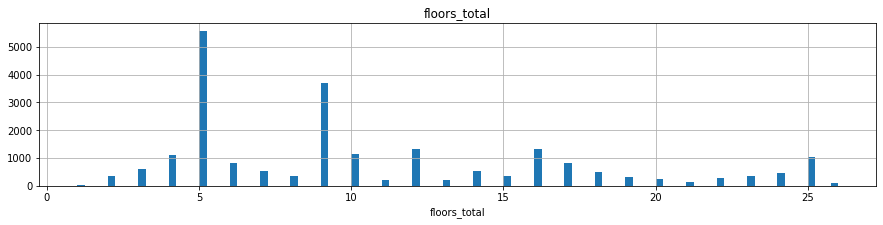

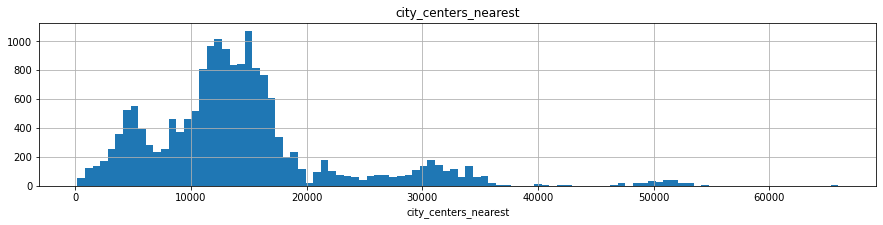

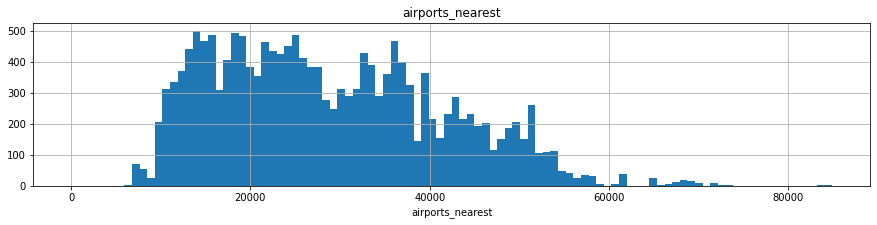

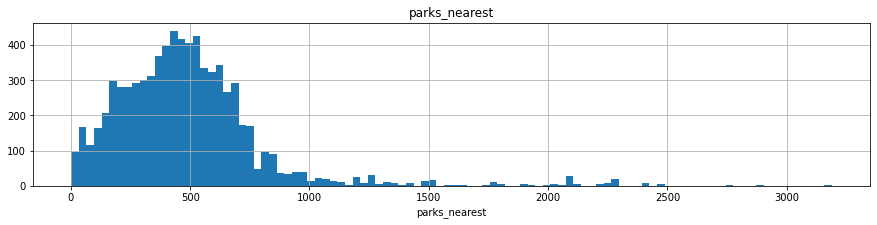

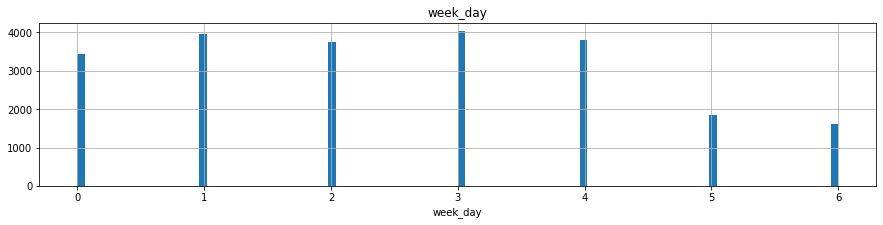

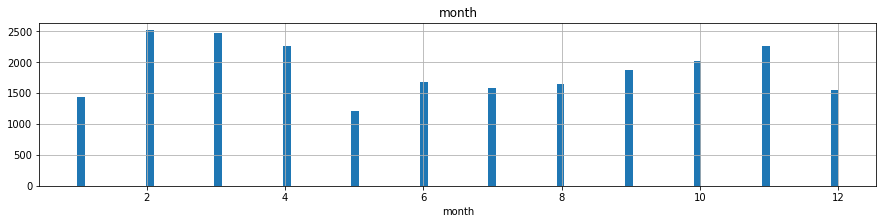

In [84]:
hist_list = ['total_area', 'living_area', 'kitchen_area', 'last_price',
             'rooms', 'ceiling_height', 'floor', 'floors_total',
            'city_centers_nearest', 'airports_nearest', 'parks_nearest', 'week_day', 'month']

for col in hist_list:
    clean_data.hist(column=col, bins=100, figsize=(15,3));
    plt.xlabel(col)
    plt.show()

Отдельно построим график:

- тип этажа квартиры («первый», «последний», «другой»);

Столбец floors_type содержит категориальные значения типа string, построим гистограмму по этому столбцу, предварительно использовав метод value_counts()

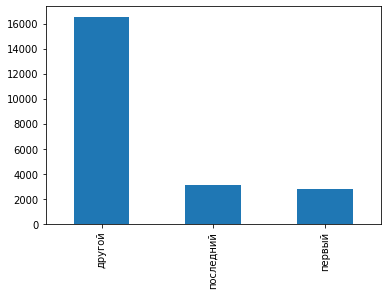

In [85]:
floor_type = clean_data['floors_type'].value_counts()

floor_type.plot(kind='bar');

#### Описание графиков

Столбцы total_area, living_area имеют несколько пиковых значений (30, 45 метров общей площади и 17, 30 метров жилой площади). Такие значения обусловленны наиболее часто-встречаемыми квартирами с планировкой 1, 2 комнаты.

Площадь кухни чаще всего приходится на диапазон 5-10 квадратных метров.

Гистограмма стоимости жилья похожа на распределение Пуасона с максимальным значением в районе 4 млн рублей. График имеет плавные спады с отдалением от максимальных значений.

Столбец rooms содержит в себе дискретные величины, наиболее частовстречаемая - однокомнатная квартира. С увеличением количества комнат уменьшается частота объявлений. Выглядит вполне логично.

Самая частая высота потолков в квратирах в районе 2.5м.

Самые "популярные" этажи сконцентрированы в диапозоне от 1-5 этажей. С увеличением этажа падает частотность квартир с таким расположением. Наиболее часто встречаются квартиры, расположенные на втором этаже.

Столбец floors_total показывает, что в Санкт-Петербурге чаще всего можно встретить объявление о продаже квартиры именно в пятиэтажном доме.

Удаление от центра имеет два характерных пика в районе 11км и 15км, а от аэропорта 15км и 20км. Удаление от ближайшего парка похоже на распределение Пуасона с максимумом в районе 500м.


Чаще всего объявления публикуются в будни, особенно вторник и четверг. На выходных публикации появляются значительно реже.
По графику month видно, что рынок недвижимости наболее активен в период с февраля по апрель включительно, а также в октябре и ноябре.

Первый и последний этаж в доме встречаются с похожей частотностью, преобладают промежудочные этажи "другие".



Построим гистаграму продаж по времени:

##### days_exposition

count    19489.000000
mean       174.912053
std        205.266484
min          3.000000
25%         45.000000
50%         94.000000
75%        227.000000
max       1200.000000
Name: days_exposition, dtype: float64


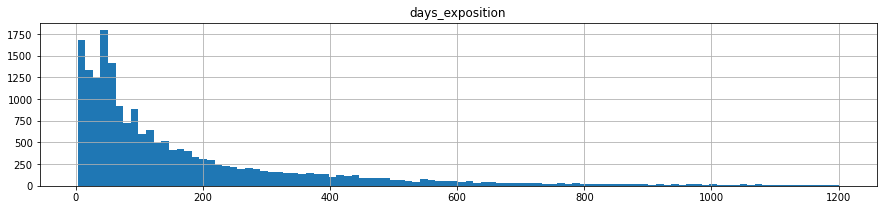

In [86]:
clean_data.hist(column=['days_exposition'], bins=100, figsize=(15, 3))
print(clean_data['days_exposition'].describe())

Среднее (174 дней) значение сильно смещено из-за влияния очень долгих продаж. Медиана отражает более точное значение времени продажи квартиры - 94 дней. 

Максимум приходится на значения порядка 50-ти дней.

Исходя из первого и третьего квантиля можно сказать, что быстрые продажи происходят в диапозоне от 1 дня до 45 дней, а долгие продажи начинаются от 232 дней и более.

In [87]:
speed_table = clean_data.pivot_table(index='year', values='days_exposition', aggfunc='mean')
speed_table.columns = ['days_exposition_avg']
speed_table

,days_exposition_avg
year,
2014,803.626374
2015,602.976884
2016,319.533411
2017,158.560564
2018,94.283862
2019,31.069032


###### исследование мод

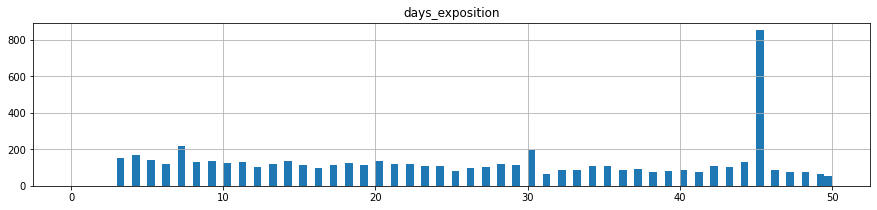

In [88]:
clean_data.hist(column=['days_exposition'], bins=100, figsize=(15, 3), range=(0, 50));

Выделяется столбец в 45 дней. По условиям размещения на Яндекс Недвижимости, квартиры стоимостью до 4,5 млн рублей, выставленные на продажу размещаются как раз сроком до 45 дней. Построим гистограму стоимости для объявлений, которые были опубликованы в течении 45 дней.

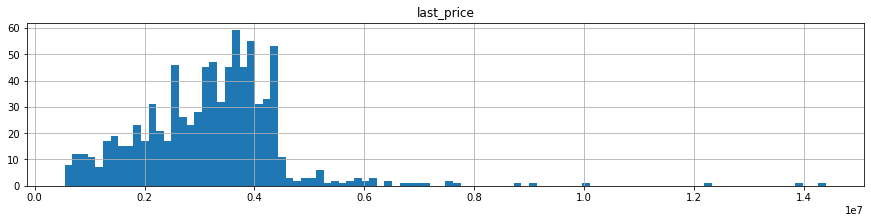

In [89]:
clean_data[clean_data['days_exposition'] == 45].hist(column=['last_price'], 
                                                       bins=100, figsize=(15,3));

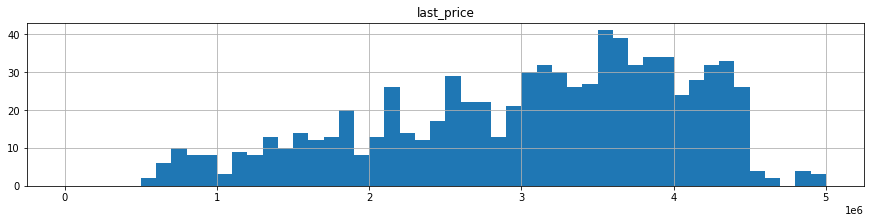

In [90]:
clean_data[clean_data['days_exposition'] == 45].hist(column=['last_price'], 
                                                       bins=50, figsize=(15,3), range=(0, 5000000));

Получается, что значения столбца days_exposition искажены условиями размещения на площадке Яндекс Недвижимости, так как большая часть квартир, которые были размещены 45 дней имеют стоимость до 4,5 млн.

Аналогичные условия размещения есть для значений 60 и 90 дней. Исследуем их.

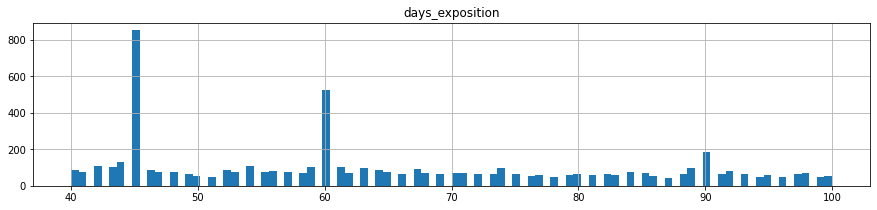

In [91]:
clean_data.hist(column=['days_exposition'], bins=100, figsize=(15, 3), range=(40, 100));

На графиках как раз выделяются значения на 45, 60 и 90 дней.

Рассмотрим гистограмму стоимости для тех, ето был размещен 60 дней.

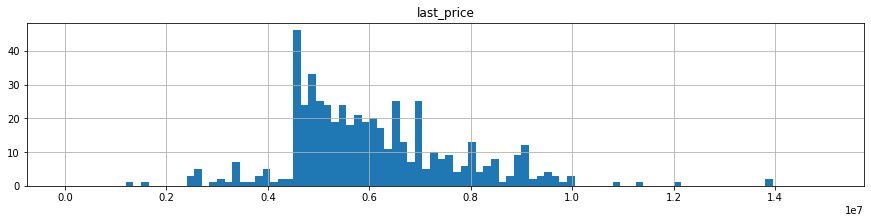

In [92]:
clean_data[clean_data['days_exposition'] == 60].hist(column=['last_price'], 
                                                       bins=100, figsize=(15,3), range=(0, 15000000));

Резкое увеличение в области 4,5 млн, постепенно снижающееся до 10 млн.

Посмотри детально на тех, кто был размещен 90 дней.

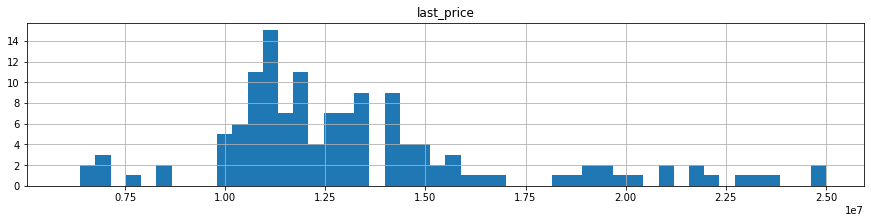

In [93]:
clean_data[clean_data['days_exposition'] == 90].hist(column=['last_price'], 
                                                       bins=50, figsize=(15,3), range=(6000000, 25000000));

Здесь не так ярко выражено, так как предложений от 10млн меньше, чем от 4,5млн и диапозон времени для продажи больше, однако тренд все равно заметен.

###### Вывод

Отметим, что условия размещения объявлений вносят искажения в датасет.

##### total_area, living_area, kitchen_area

Построим графики зависимости цены квартиры от total_area, living_area, kitchen_area и посчитаем корреляцию Пирсона для этих параметров.

Значение кореляции для total_area 0.77
Значение кореляции для living_area 0.63
Значение кореляции для kitchen_area 0.57
Значение кореляции для rooms 0.47


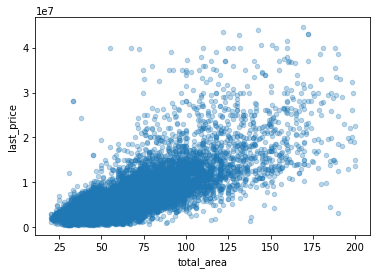

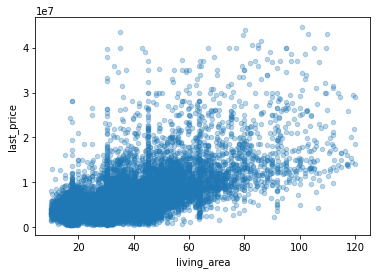

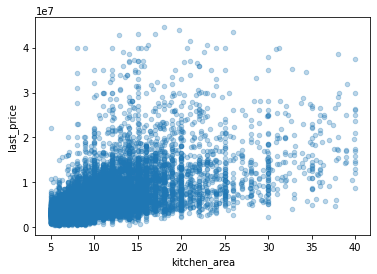

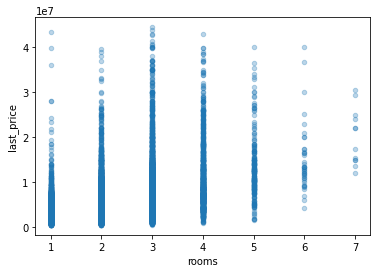

In [94]:
corr_list = ['total_area', 'living_area', 'kitchen_area', 'rooms']
for col in corr_list:
    clean_data.plot(x=col, y='last_price', kind='scatter', alpha=0.3)
    print('Значение кореляции для', col, round(clean_data['last_price'].corr(clean_data[col]), 2))

На графиках total_area, living_area, kitchen_area, rooms видно, что прослеживается зависимость, однако разброс значений ощутимый. 

Тем не менее значения корреляции умеренные и положительные. Наибольшую корреляцию показывает столбец total_area (0.77), график этой зависимости более сконцентрирован и направлен.

##### week_day

Зависимость от week_day, month, year и floors_type рассмотрим отдельно.

In [95]:
week_day_table = clean_data.pivot_table(index=['week_day'], values='last_price', aggfunc=['mean', 'median'])
week_day_table.columns=['avg_price', 'median_price']
week_day_table

,avg_price,median_price
week_day,,
0,5.810548e+06,4627500.0
1,5.759605e+06,4700000.0
2,5.853395e+06,4690000.0
3,5.884067e+06,4600000.0
4,5.680822e+06,4550000.0
5,5.581512e+06,4500000.0
6,5.595906e+06,4500000.0


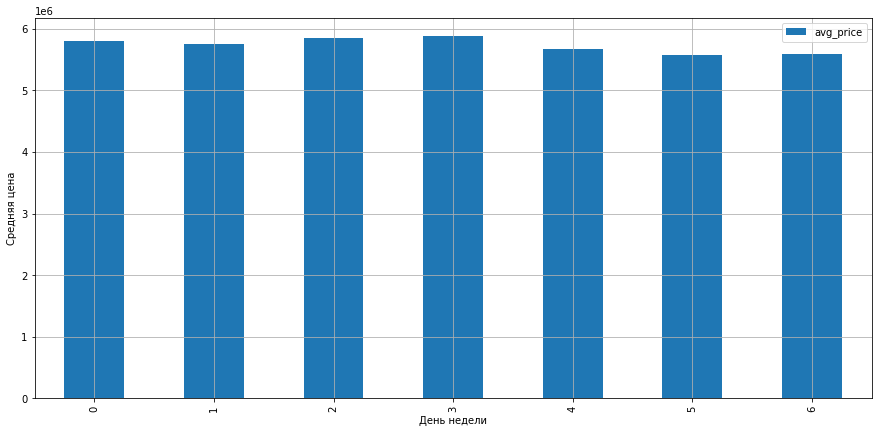

In [96]:
week_day_table.plot(y='avg_price', kind='bar', figsize=(15, 7), grid=True)
plt.xlabel('День недели')
plt.ylabel('Средняя цена')
plt.show()

Средняя стоимость квартиры в зависимости от дня недели колеблится от 5,59млн до 5,88млн. Значение изменяются незначительно.

##### month

Рассмотрим параметр month.

In [97]:
month_table = clean_data.pivot_table(index=['month'], values='last_price', aggfunc='mean')
month_table.columns=['avg_price']
month_table

,avg_price
month,
1,5.786080e+06
2,5.787824e+06
3,5.701305e+06
4,5.744088e+06
5,5.820698e+06
6,5.576855e+06
7,5.688078e+06
8,5.884982e+06
9,5.868438e+06


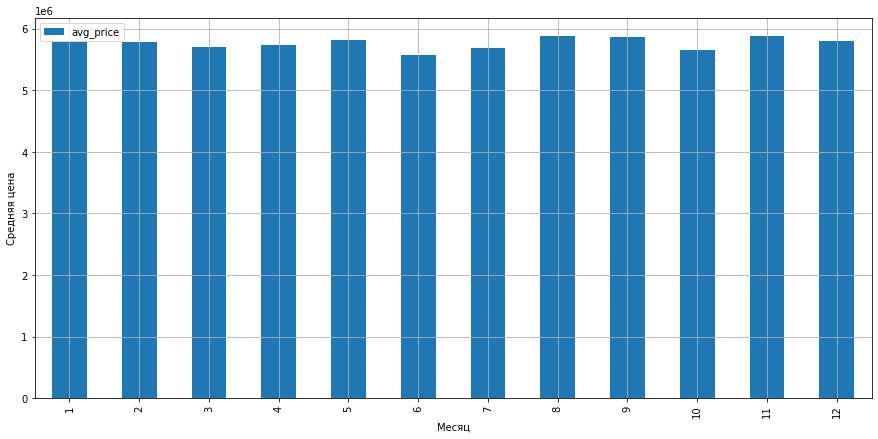

In [98]:
month_table.plot(y='avg_price', kind='bar', figsize=(15, 7), grid=True)
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')
plt.show()

##### year
В зависимости от месяца средняя цена изменяется в пределах от 5,57млн до 5,88. Значения изменяются незначительно.

In [99]:
year_table = clean_data.pivot_table(index=['year'], values='last_price', aggfunc=['mean', 'count'])
year_table.columns=['avg_price', 'count']
year_table

,avg_price,count
year,,
2014,9.405498e+06,106
2015,6.482290e+06,1051
2016,5.803146e+06,2650
2017,5.687585e+06,7767
2018,5.573153e+06,8148
2019,6.105553e+06,2761


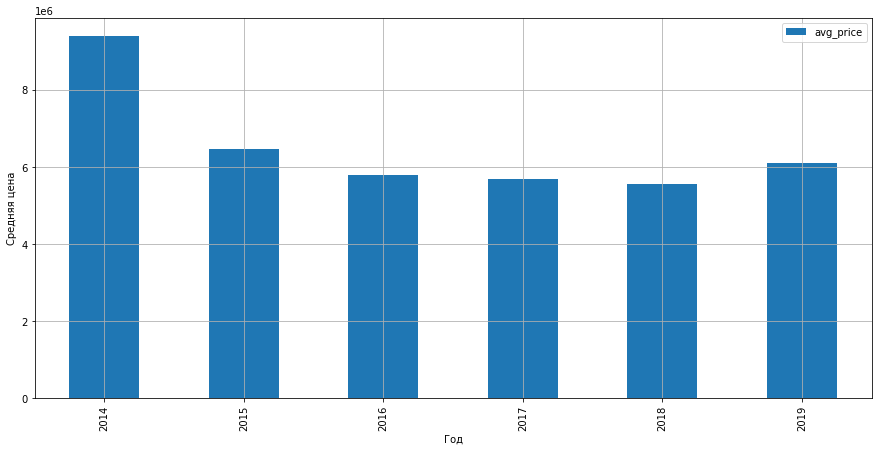

In [100]:
year_table.plot(y='avg_price', kind='bar', figsize=(15, 7), grid=True)
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.show()

Средняя цена по годам значительно упала от 2014 года к 2015 на 31%. Далее был тренд к снижению до 2019 года. В 2019 году средняя цена квартиры выросла на 9% по сравнению с 2018 годом.

Однако количество объявлений тоже изменялось с годами, причем в самый "дорогой" 2014-й год количество объявлений - 106. А в самый "дешёвый" 2018 год - 8148. За 2019 год 2761 объявление. Наблюдается закономерность, что с увеличением количества записей падает значение средней цены недвижимости за год.

###### Зависимость от других параметров

In [101]:
year_table['avg_price'].corr(year_table['count'])

-0.6730413534267408

Умеренное и стремящееся к высокому значение отрицательной корреляции.

In [102]:
total_area_table = clean_data.pivot_table(index=['year'], values='total_area', aggfunc=['mean', 'count'])
total_area_table.columns=['avg_area', 'count']
total_area_table

,avg_area,count
year,,
2014,79.103868,106
2015,64.276965,1051
2016,59.124487,2650
2017,57.920577,7767
2018,56.261026,8148
2019,56.910333,2761


Видно, что с годами средняя площадь объектов недвижимости ведет себя схожим образом как и средняя цена. 

Объединим в одну таблицу для наглядности.

In [103]:
year_table['avg_area'] = total_area_table['avg_area']
year_table

,avg_price,count,avg_area
year,,,
2014,9.405498e+06,106,79.103868
2015,6.482290e+06,1051,64.276965
2016,5.803146e+06,2650,59.124487
2017,5.687585e+06,7767,57.920577
2018,5.573153e+06,8148,56.261026
2019,6.105553e+06,2761,56.910333


Посчитаем корреляцию между средней ценой за год и средней площадью за год.

In [104]:
year_table['avg_price'].corr(year_table['avg_area'])

0.9799287276450094

Корреляция имеет высокое положительное значение 0,97.

##### floors_type

Изучим зависимость от типа этажа.

In [105]:
floors_type_table = clean_data.pivot_table(index=['floors_type'], values='last_price', aggfunc='mean')
floors_type_table.columns=['avg_price']
floors_type_table

,avg_price
floors_type,
другой,6.035495e+06
первый,4.548956e+06
последний,5.433829e+06


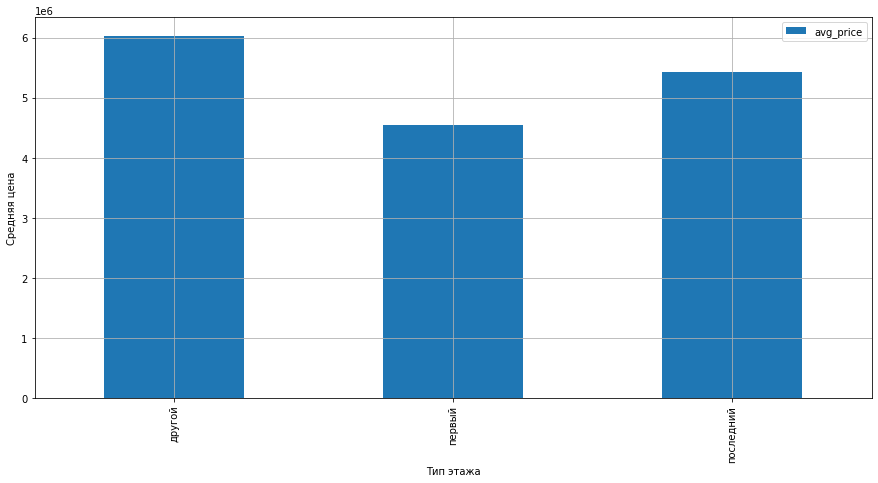

In [106]:
floors_type_table.plot(y='avg_price', kind='bar', figsize=(15, 7), grid=True)
plt.xlabel('Тип этажа')
plt.ylabel('Средняя цена')
plt.show()

Объявления с размещением квартиры на первом этаже имеют самую низкую среднюю цену (4,54 млн). На последнем этаже это значение выше - 5,43млн. Лидер - это остальные варианты ("другой") с 6,03млн.

##### Вывод

Каждый год совокупный набор объявлений меняется: меняется их количество, средняя площадь объектов недвижимости, соответственно, и средняя стоимость. 

#### Топ 10 населенных пунктов

##### Сводная таблица

In [107]:
top_locality = clean_data['locality_name'].value_counts().nlargest(10)

meters_price_table = pd.pivot_table(clean_data[clean_data['locality_name'].isin(top_locality.index)], 
                                    index='locality_name', values=['last_price','total_area'], aggfunc='sum')
meters_price_table['avg_meters_price'] = round(meters_price_table['last_price'] / meters_price_table['total_area'], 2)
meters_price_table = meters_price_table.sort_values(by='avg_meters_price', ascending=False)
meters_price_table

,last_price,total_area,avg_meters_price
locality_name,,,
санкт-петербург,1.031605e+11,907540.68,113670.42
пушкин,2.145688e+09,20470.30,104819.57
деревня кудрово,1.223854e+09,13474.04,90830.53
поселок парголово,1.177465e+09,13633.39,86366.30
поселок мурино,1.685735e+09,20460.37,82390.27
поселок шушары,1.783126e+09,23410.96,76166.29
колпино,1.302939e+09,17644.74,73842.93
гатчина,1.057919e+09,15430.88,68558.59
всеволожск,1.490500e+09,22050.43,67595.05


##### Гистограмма

Визуализируем получившуюся таблицу

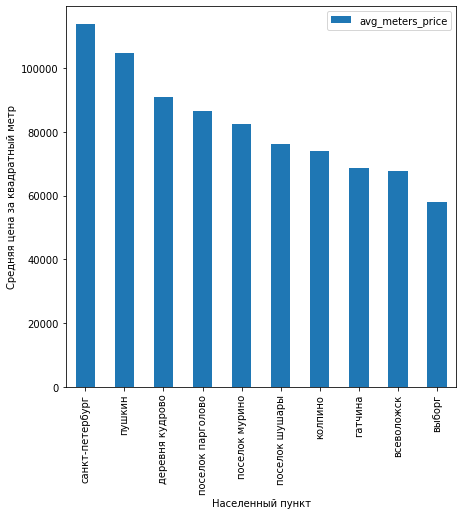

In [108]:
meters_price_table.plot(y='avg_meters_price', kind='bar', figsize=(7, 7))
plt.xlabel('Населенный пункт')
plt.ylabel('Средняя цена за квадратный метр')
plt.show()

#### Квартиры в Санкт-Петербурге по километражу

##### Группмровка данных

Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра(по удалению от центра).

In [109]:
spb_flats = clean_data.query('locality_name == "санкт-петербург" ')
spb_flats_table = spb_flats.pivot_table(index='city_centers_km', values=['last_price','total_area'], aggfunc='sum')
spb_flats_table['avg_meters_price'] = spb_flats_table['last_price'] / spb_flats_table['total_area']
spb_flats_table

,last_price,total_area,avg_meters_price
city_centers_km,,,
0.0,2.144790e+08,1534.30,139789.480545
1.0,1.913260e+09,13997.08,136689.938116
2.0,2.902051e+09,22099.89,131315.178492
3.0,3.084788e+09,26239.90,117560.960636
4.0,6.681691e+09,53420.15,125078.103000
5.0,8.946654e+09,66901.78,133728.193346
6.0,5.546802e+09,39292.21,141167.984036
7.0,3.948846e+09,26862.83,147000.363030
8.0,4.958166e+09,39238.02,126361.267974


##### Визуализация

Добавим визуализацию

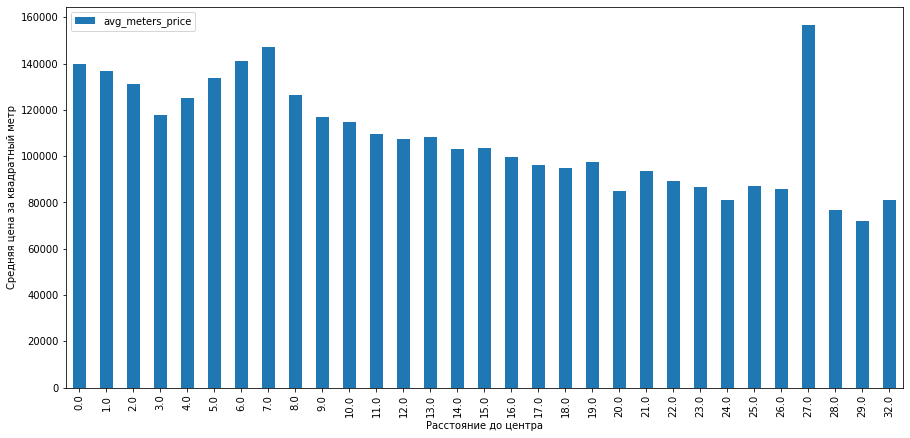

In [110]:
spb_flats_table.plot(y='avg_meters_price', kind='bar', figsize=(15, 7))
plt.xlabel('Расстояние до центра')
plt.ylabel('Средняя цена за квадратный метр')
plt.show()

##### Обработка аномалий

Изучим подробнее провал на 3 км и пик на 5 и 7 километрах.

In [111]:
third_km = clean_data.query(
    'city_centers_km == 3 & locality_name == "санкт-петербург"').pivot_table(index='floors_type', 
                                                                  values='last_price',
                                                                  aggfunc='count')
third_km.columns = ['count']
third_km['share'] = third_km['count'] / third_km['count'].sum()
third_km

,count,share
floors_type,,
другой,191,0.600629
первый,54,0.169811
последний,73,0.229560


На 3-м километре доля квартир, расположенных на первом этаже 16,8%, а доля когорты "другой" составляет 60%

In [112]:
five_km = clean_data.query('city_centers_km == 5 & locality_name == "санкт-петербург"').pivot_table(index='floors_type', 
                                                                  values='last_price',
                                                                  aggfunc='count')
five_km.columns = ['count']
five_km['share'] = five_km['count'] / five_km['count'].sum()
five_km

,count,share
floors_type,,
другой,619,0.755800
первый,76,0.092796
последний,124,0.151404


На 5-м километре доля квартир на первом этаже значительно ниже 9%, "другой" - 75%

In [113]:
seven_km = clean_data.query('city_centers_km == 7 & locality_name == "санкт-петербург"').pivot_table(index='floors_type', 
                                                                  values='last_price',
                                                                  aggfunc='count')
seven_km.columns = ['count']
seven_km['share'] = seven_km['count'] / seven_km['count'].sum()
seven_km

,count,share
floors_type,,
другой,291,0.771883
первый,31,0.082228
последний,55,0.145889


На 7-м километре доля квартир на первом этаже составляет 8%, "другой" - 77%

Существует взаимосвязь между ценой квадратного метра и этажом, на котором расположена квартира.

Изучим выброс на 27-м километре.

In [114]:
twenty_seven = clean_data.query('city_centers_km == 27 & locality_name == "санкт-петербург"')
len(twenty_seven)

2

На 27-м километре очень маленькая выборка - 2 варианта/

In [115]:
twenty_seven_km = twenty_seven.pivot_table(index='floors_type', 
                                                values=['last_price', 'total_area'],
                                                aggfunc='sum')
twenty_seven_km.columns = ['price', 'area']
twenty_seven_km['meters_price'] =  twenty_seven_km['price'] / twenty_seven_km['area']
twenty_seven_km

,price,area,meters_price
floors_type,,,
другой,14350000.0,74.0,193918.918919
последний,2250000.0,32.0,70312.500000


Причем один из них имеет стоимость квадратного метра 193 918 рублей, что и искажает график.

##### Вывод

Общий тренд такой: чем ближе находится объект недвижимости к центру города, тем выше его стоимость квадратного метра. Однако еще на стоимость квадратного метра влияент выборка квартир по их расположению в доме, а так же количество квартир.

### Общий вывод

В данном исследовании выполнено:
 - предварительное знакомство с данными;
 - предобработка (заполнение пустых значений, выявление неявных дубликатов, обработаны аномалии и выбросы);
 - добавлены новые параметры для расчета;
 - проведен исследовательский анализ значений, построены графики, посчитаны корреляции;
 
На основе проделанной работы были сделаны следующие выводы:
 
 - Условия размещения объявления Яндекс Недвижимости вносят искажения в значения длительности размещения;
 - Наиболее популярными типами объектов недвижимости являются однокомнатные квартиры;
 - Существует зависимость между ценой на объекты недвижимости и общей площадью, жилой площадью, площадью кухни и количеством комнат объекта недвижимости;
 - С течением времени (с годами) меняются наборы объявлений о продаже недвижимости, по их количеству, средней площади, этажности. Это влечет за собой изменение стоимости объектов недвижимости;   
 - Расстояние до центра города и этажность объектов недвижимости оказывают влияние на стоимость квадратного метра;

### Дополнительные графики

In [116]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

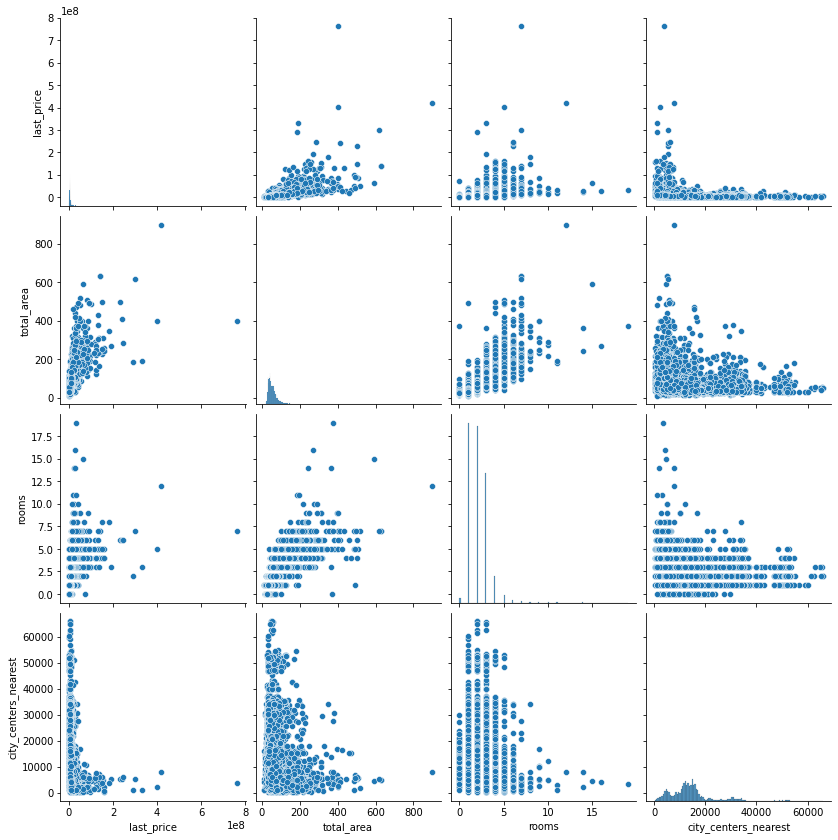

In [117]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']])
plt.gcf().set_size_inches(12,12);


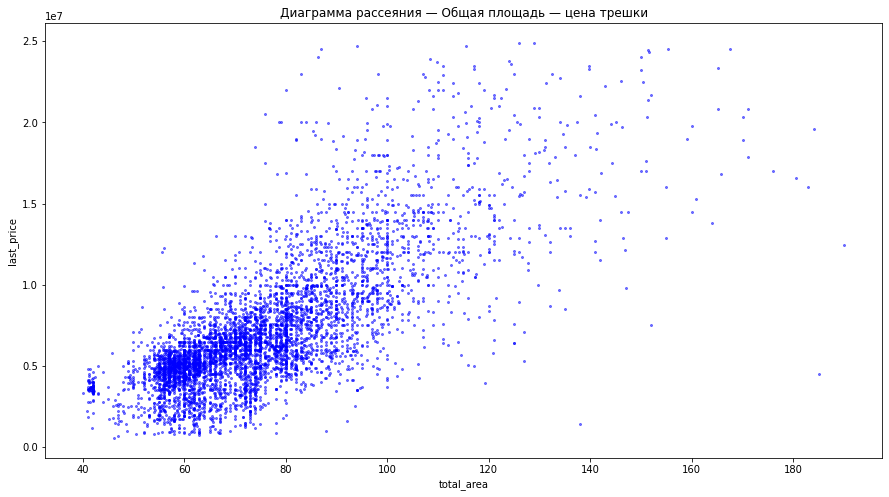

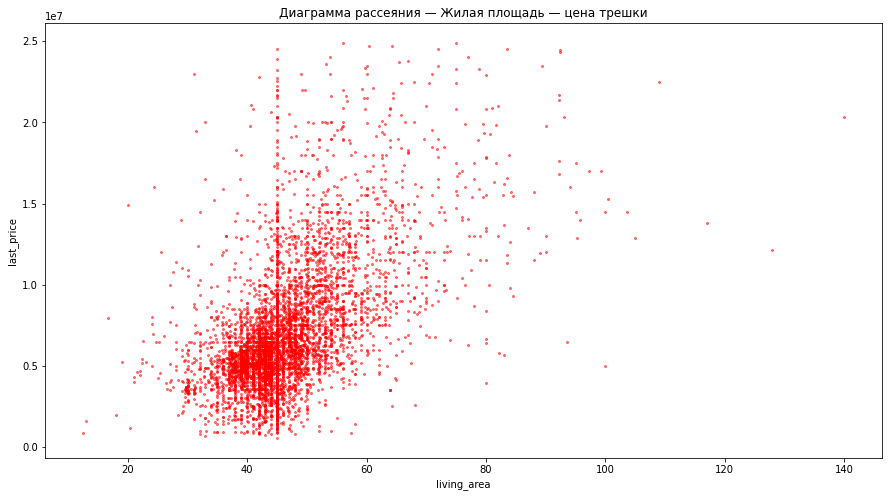

In [118]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод